<a href="https://colab.research.google.com/github/JahaanThakkar/Computational-Physics-Assignments/blob/main/Assgn2_Jahaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt
from math import *

# Problem 2


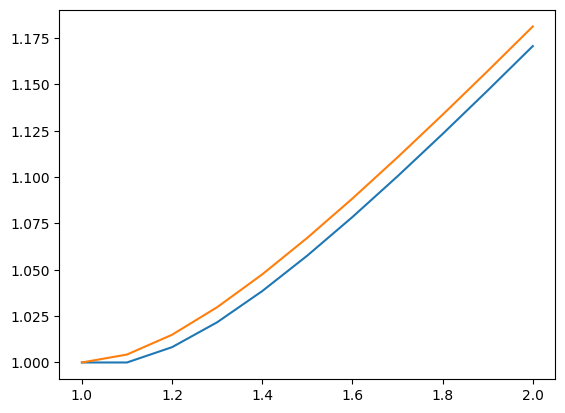

In [ ]:
# Define the parameters
dt = 0.1  # Time step
t_initial = 1.0
t_final = 2.0  # Final time
N = int((t_final - t_initial) / dt)  # Number of time steps
y0 = 1.0  # Initial condition

T = np.linspace(t_initial,t_final,N+1)
Y = np.zeros(N+1)
Yt = np.zeros(N+1)
Y[0] = y0
Yt[0] = y0

# Euler method loop
for i in range(N):
    y = Y[i]
    t = T[i]
    dy_dt = (y/t) - (y/t)**2  # Define the derivative
    Y[i+1] = y + (dy_dt*dt)  # Euler integration step
    Yt[i+1] = T[i+1]/(1 + log(T[i+1]))

plt.figure(0)
plt.plot(T,Y)
plt.plot(T,Yt)
plt.show()

# Problem 3

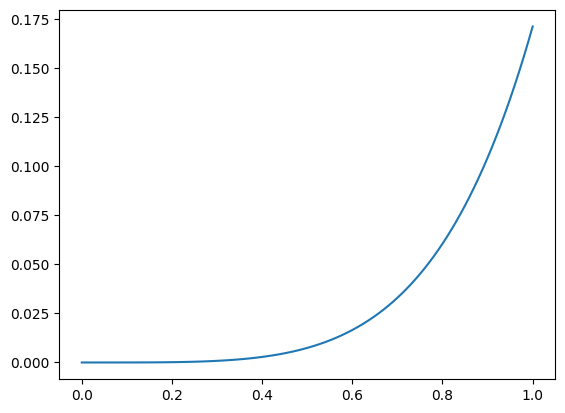

In [ ]:
import numpy as np

def f(x, y):
    return np.array([y[1], x*(e**x) - x - y[0] + (2*y[1])])  # Example function, replace with your own

def RK4_second_order_eqn(dx, x_initial, x_final, y_initial, v_initial):
    N = int((x_final - x_initial)/dx)
    X = np.linspace(x_initial, x_final, N+1)
    Y = np.zeros([N+1,2])

    Y[0,0] = y_initial
    Y[0,1] = v_initial

    for i in range(N):
        k1 = np.multiply(dx,f(X[i],Y[i]))

        k2 = np.multiply(dx,f(X[i] + 0.5*dx,Y[i] + 0.5*k1))

        k3 = np.multiply(dx,f(X[i] + 0.5*dx,Y[i] + 0.5*k2))

        k4 = np.multiply(dx,f(X[i] + dx,Y[i] + k3))

        Y[i+1] = Y[i] + (k1 + 2*k2 + 2*k3 + k4)/6

    return X, Y

X,Y = RK4_second_order_eqn(0.01, 0.0, 1.0, 0.0, 0.0)

plt.plot(X,Y[:,0])

# Problem 8

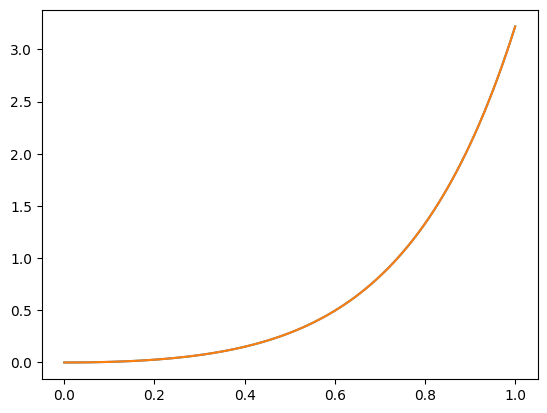

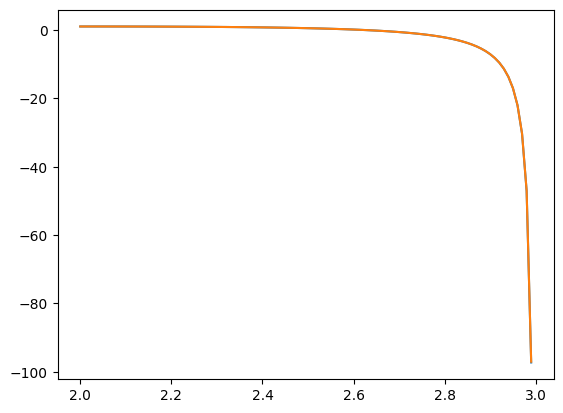

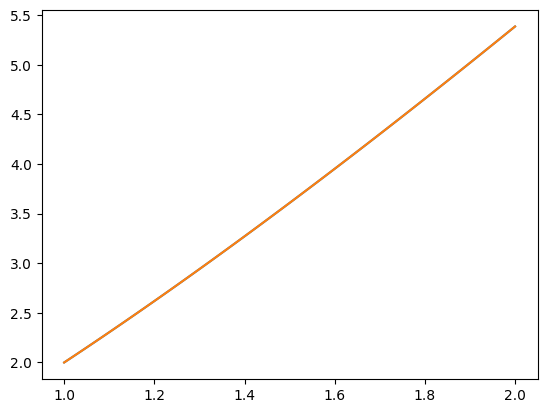

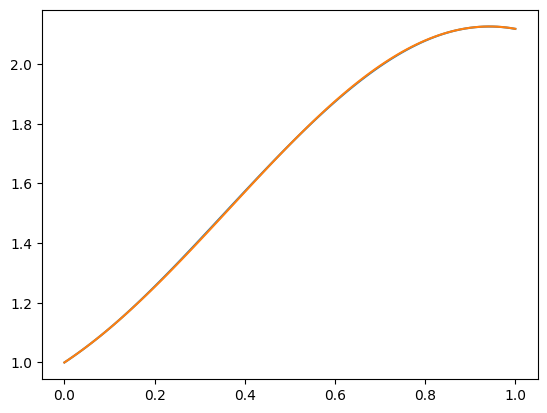

In [ ]:
from scipy.integrate import solve_ivp

def f1(t, y):
    dydt = t*(e**(3*t)) - (2*y)
    return dydt

def f2(t, y):
    dydt = 1 - (t-y)**2
    return dydt

def f3(t, y):
    dydt = 1 + (y/t)
    return dydt

def f4(t, y):
    dydt = cos(2*t) + sin(3*t)
    return dydt

N = 100
sol1 = solve_ivp(f1, [0, 1], [0], t_eval=np.linspace(0,1,N+1))
sol2 = solve_ivp(f2, [2, 3], [1], t_eval=np.linspace(2,3,N+1))
sol3 = solve_ivp(f3, [1, 2], [2], t_eval=np.linspace(1,2,N+1))
sol4 = solve_ivp(f4, [0, 1], [1], t_eval=np.linspace(0,1,N+1))

plt.figure(0)
plt.plot(sol1.t,sol1.y[0])
plt.plot(sol1.t,(1/25)*e**(-2*sol1.t)*(1 + e**(5*sol1.t)*(-1 + (5*sol1.t))))
plt.show()

plt.figure(1)
plt.plot(sol2.t,sol2.y[0])
plt.plot(sol2.t,(1-(3*sol2.t)+(sol2.t**2))/(-3+sol2.t))
plt.show()

plt.figure(2)
plt.plot(sol3.t,sol3.y[0])
plt.plot(sol3.t,sol3.t*(2 + np.log(sol3.t)))
plt.show()

plt.figure(3)
plt.plot(sol4.t,sol4.y[0])
plt.plot(sol4.t,(1/6)*(8-(2*np.cos(3*sol4.t))+(3*np.sin(2*sol4.t))))
plt.show()

# Problem 9

<ipython-input-43-27711dd6a47b>:20: RuntimeWarning: divide by zero encountered in log
  return np.vstack((y[1], y[1]*np.cos(x)-y[0]*np.log(y[0])))
<ipython-input-43-27711dd6a47b>:20: RuntimeWarning: invalid value encountered in multiply
  return np.vstack((y[1], y[1]*np.cos(x)-y[0]*np.log(y[0])))


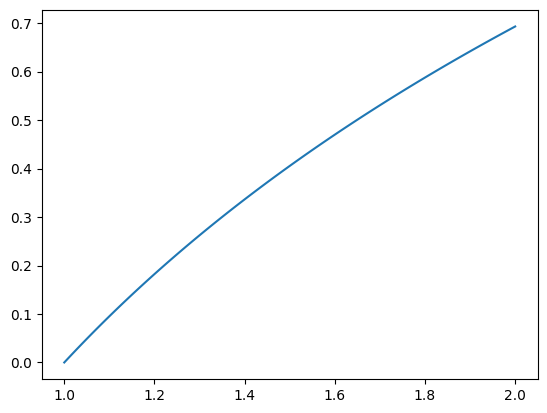

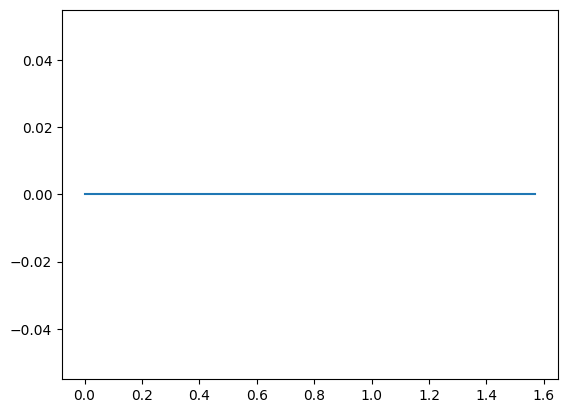

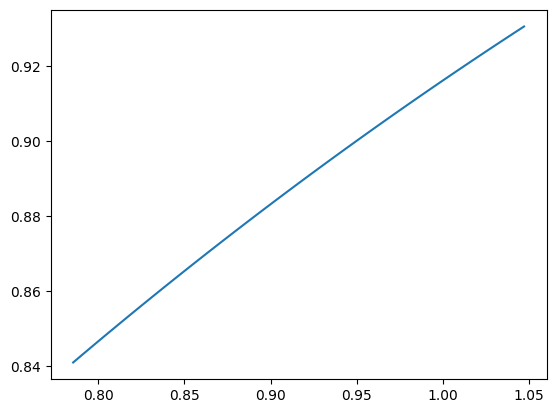

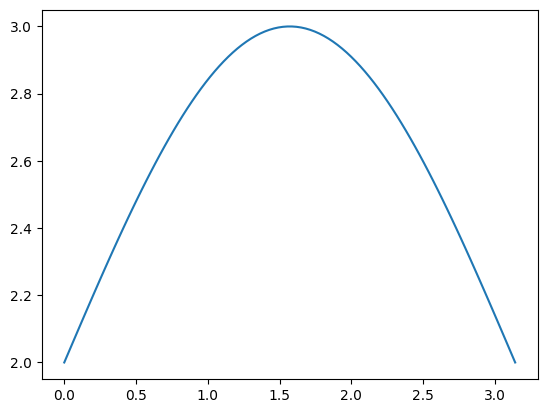

In [ ]:
from scipy.integrate import solve_bvp

def ode1(x, y):
    return np.vstack((y[1], -e**(-2*y[0])))

def bc1(ya, yb):
    return np.array([ya[0] - 0, yb[0] - log(2)])

a1 = 1
b1 = 2

x_guess1 = np.linspace(a1, b1, 100)
y_guess1 = np.zeros((2, x_guess1.size))

sol1 = solve_bvp(ode1, bc1, x_guess1, y_guess1)

y_plot1 = sol1.sol(x_guess1)[0]

def ode2(x, y):
    return np.vstack((y[1], y[1]*np.cos(x)-y[0]*np.log(y[0])))

def bc2(ya, yb):
    return np.array([ya[0] - 1, yb[0] - e])

a2 = 0
b2 = pi/2

x_guess2 = np.linspace(a2, b2, 100)
y_guess2 = np.zeros((2, x_guess2.size))

sol2 = solve_bvp(ode2, bc2, x_guess2, y_guess2)

y_plot2 = sol2.sol(x_guess2)[0]

def ode3(x, y):
    return np.vstack((y[1], -(2*(y[1])**3 + (y[0]**2)*y[1])))

def bc3(ya, yb):
    return np.array([ya[0] - 2**(-1/4), yb[0] - (12**(1/4))/2])

a3 = pi/4
b3 = pi/3

x_guess3 = np.linspace(a3, b3, 100)
y_guess3 = np.zeros((2, x_guess3.size))

sol3 = solve_bvp(ode3, bc3, x_guess3, y_guess3)

y_plot3 = sol3.sol(x_guess3)[0]

def ode4(x, y):
    return np.vstack((y[1], (1 - y[1]**2 - (y[0]*np.sin(x)))/2))

def bc4(ya, yb):
    return np.array([ya[0] - 2, yb[0] - 2])

a4 = 0
b4 = pi

x_guess4 = np.linspace(a4, b4, 100)
y_guess4 = np.zeros((2, x_guess4.size))

sol4 = solve_bvp(ode4, bc4, x_guess4, y_guess4)

y_plot4 = sol4.sol(x_guess4)[0]

plt.figure(0)
plt.plot(x_guess1, y_plot1)
plt.show()

plt.figure(1)
plt.plot(x_guess2, y_plot2)
plt.show()

plt.figure(2)
plt.plot(x_guess3, y_plot3)
plt.show()

plt.figure(3)
plt.plot(x_guess4, y_plot4)
plt.show()

# Problem 12

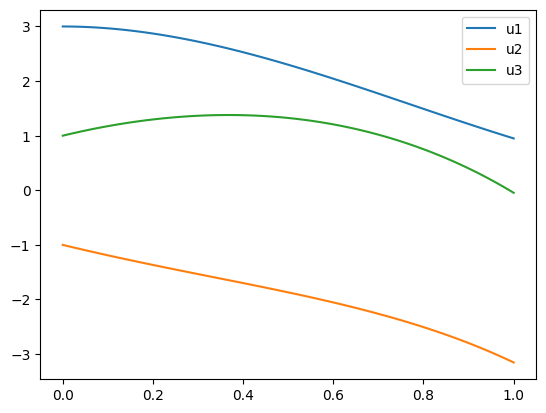

In [ ]:
from scipy.integrate import solve_ivp

def f(t, u):
    u1p = u[0] + (2*u[1]) - (2*u[2]) + e**(t)
    u2p = u[1] + u[2] - (2*(e**(-t)))
    u3p = u[0] + (2*u[1]) + e**(-t)
    return np.array([u1p,u2p,u3p])

N = 100
sol = solve_ivp(f, [0, 1], [3,-1,1], t_eval=np.linspace(0,1,N+1))

plt.figure(0)
plt.plot(sol.t,sol.y[0],label='u1')
plt.plot(sol.t,sol.y[1],label='u2')
plt.plot(sol.t,sol.y[2],label='u3')
plt.legend()
plt.show()

# Problem 14

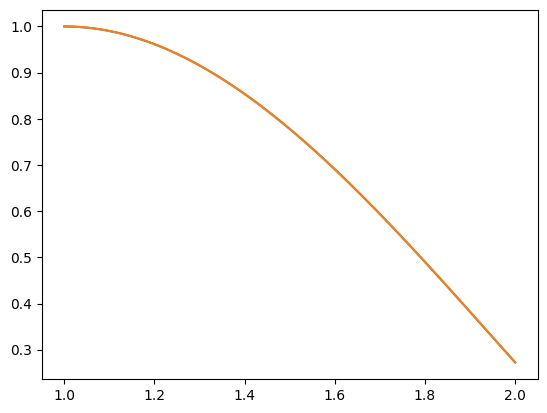

In [ ]:
# Define the parameters
dt = 0.001  # Time step
t_initial = 1.0
t_final = 2.0  # Final time
N = int((t_final - t_initial) / dt)  # Number of time steps
y0 = np.array([1.0, 0.0])  # Initial condition

T = np.linspace(t_initial,t_final,N+1)
Y = np.zeros([N+1,2])
Yt = np.zeros(N+1)
Y[0] = y0
Yt[0] = y0[0]

# Euler method loop
for i in range(N):
    y = Y[i]
    t = T[i]
    dy_dt = np.array([y[1],(((t**3)*log(t)) - 2*y[0] + (2*t*y[1]))/(t**2)])  # Define the derivative
    Y[i+1] = y + np.multiply(dy_dt,dt)  # Euler integration step
    Yt[i+1] = 7*T[i+1]/4 + ((T[i+1])**3)*log(T[i+1])/2 - (3/4)*(T[i+1])**3

plt.figure(0)
plt.plot(T,Y[:,0])
plt.plot(T,Yt)
plt.show()